In [125]:
import keras
from keras.datasets import mnist
from keras.utils import np_utils

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('white')
sns.set(font_scale=1.5)

In [126]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [127]:
X_train.shape

(60000, 28, 28)

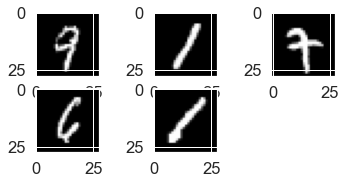

In [137]:
for i in range(331, 336):
    plt.subplot(i)
    random_num = np.random.randint(0,len(X_train))
    plt.imshow(X_train[random_num], cmap=plt.get_cmap('gray'))

In [129]:
#store in shape that keras needs: nrows, ncols, depth
input_shape = (X_train.shape[1], X_train.shape[2], 1)
input_shape

(28, 28, 1)

In [130]:
X_train.shape[0]

60000

In [131]:
#Reshape and Convert to either 0 or 1

num_samples = X_train.shape[0]

X_train = X_train.reshape(len(X_train), input_shape[0], input_shape[1], input_shape[2])
X_test = X_test.reshape(len(X_test), input_shape[0], input_shape[1], input_shape[2])

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [132]:
# One hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [133]:
num_classes = len(y_train[0])
num_classes

10

In [134]:
'''
# Create Model
model = Sequential()

model.add(Conv2D(32, 
                 kernel_size=(3,3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64,
                 (3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dropout(.5))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(.01),
              metrics = ['accuracy'])

model.summary()
'''

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               1179776   
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)              

In [136]:
'''
batch_size = 128
epochs = 5

history = model.fit(X_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (X_test, y_test))

score = model.evaluate(X_test, y_test, verbose = 0)

print('Test Loss:',score[0], 'Test Accuracy:', score[1]
'''

Epoch 1/5
469/469 [==============================] - 63s 135ms/step - loss: 0.8552 - accuracy: 0.7396 - val_loss: 0.2989 - val_accuracy: 0.9144
Epoch 2/5
469/469 [==============================] - 65s 139ms/step - loss: 0.4345 - accuracy: 0.8683 - val_loss: 0.2364 - val_accuracy: 0.9337
Epoch 3/5
469/469 [==============================] - 64s 136ms/step - loss: 0.3630 - accuracy: 0.8906 - val_loss: 0.1902 - val_accuracy: 0.9453
Epoch 4/5
469/469 [==============================] - 65s 138ms/step - loss: 0.3223 - accuracy: 0.9037 - val_loss: 0.1700 - val_accuracy: 0.9505
Epoch 5/5
469/469 [==============================] - 64s 137ms/step - loss: 0.2917 - accuracy: 0.9139 - val_loss: 0.1529 - val_accuracy: 0.9555
Test Loss: 0.15294207632541656 Test Accuracy: 0.9555000066757202


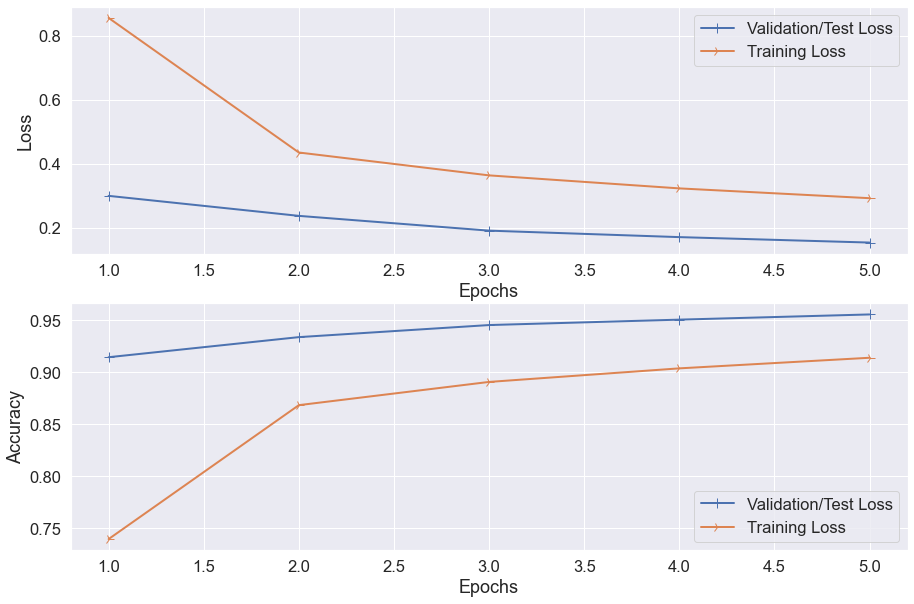

In [142]:
#Draw loss/accuracy charts over epochs
history_dict = history.history

plt.figure(figsize=(15,10))

plt.subplot(211)

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
   
epochs = range(1,len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, lw=2.0, marker='+', markersize=10.0)
plt.setp(line2, lw=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend();

plt.subplot(212)

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, acc_values , label='Training Loss')
plt.setp(line1, lw=2.0, marker='+', markersize=10.0)
plt.setp(line2, lw=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend();

In [146]:
model.save('Model\MNIST_cnn_10_epochs.h5')

In [147]:
from keras.utils.vis_utils import plot_model
import matplotlib.image as mpimg

In [ ]:
plot_model(model, to_file='Model\model_plot.png',show_shapes=True,S)